In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import scipy

## Часть 1
## a) Разделить датасет на 2 выборки (train, test) из 100 человек, с сохранением пропорции полов

In [2]:
dataset = pd.read_csv("Davis.csv").drop(columns=["Unnamed: 0"])

In [3]:
dataset

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0
...,...,...,...,...,...
195,M,74,175,71.0,175.0
196,M,83,180,80.0,180.0
197,M,81,175,NaN,NaN
198,M,90,181,91.0,178.0


In [4]:
train, test = train_test_split(dataset, test_size = 0.5, stratify = dataset.sex)

In [5]:
train

,sex,weight,height,repwt,repht
171,F,54,163,NaN,NaN
191,M,89,173,86.0,173.0
73,F,56,163,57.0,159.0
1,F,58,161,51.0,159.0
194,F,62,164,61.0,161.0
...,...,...,...,...,...
138,M,90,188,91.0,185.0
127,F,45,157,45.0,153.0
131,M,87,185,89.0,185.0
60,M,68,165,69.0,165.0


## б) Очистить выборки от выбросов - людей с нереалистичным ростом/весом

### Отобразим тепловые карты пропущенных значений для обеих выборок

<AxesSubplot:>

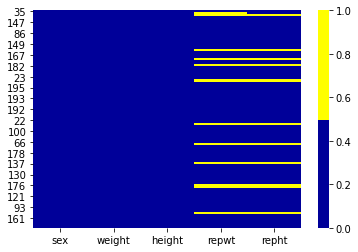

In [6]:
colours = ['#000099', '#ffff00'] 
sns.heatmap(test.isnull(), cmap=sns.color_palette(colours))

<AxesSubplot:>

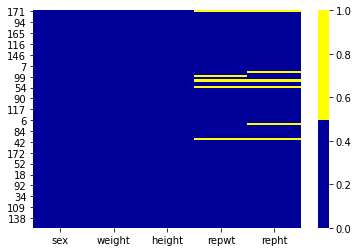

In [7]:
colours = ['#000099', '#ffff00'] 
sns.heatmap(train.isnull(), cmap=sns.color_palette(colours))

### Отбросим записи, содержащие нулевые значения, и выведем процент пропущенных значений в выборках

In [8]:
train = train.dropna(0)
test = test.dropna(0)

In [9]:
print('Процент пропущенных значений для выборки train:')
for col in train.columns:
    pct_missing = np.mean(train[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Процент пропущенных значений для выборки train:
sex - 0%
weight - 0%
height - 0%
repwt - 0%
repht - 0%


In [10]:
print('Процент пропущенных значений для выборки test:')
for col in test.columns:
    pct_missing = np.mean(test[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    test

Процент пропущенных значений для выборки test:
sex - 0%
weight - 0%
height - 0%
repwt - 0%
repht - 0%


### Отобразим выборки в графическом виде
#### До:

<AxesSubplot:xlabel='weight', ylabel='height'>

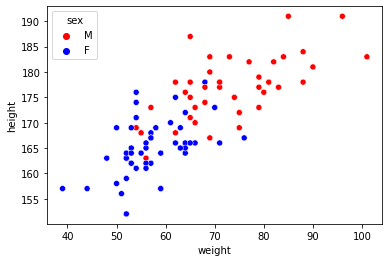

In [11]:
sns.scatterplot(x=test['weight'], y=test['height'], hue=test['sex'], palette=['red', 'blue'] )

<AxesSubplot:xlabel='weight', ylabel='height'>

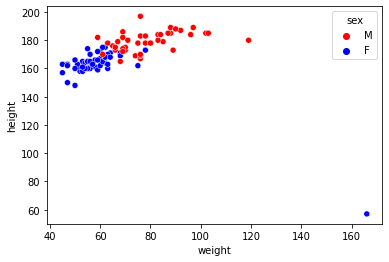

In [12]:
sns.scatterplot(x=train['weight'],  y=train['height'], hue=train['sex'], palette=['red', 'blue'])

### Чистим выборки с помощью метода стандартных отклонений

In [13]:
test_mean, test_std = test.mean(), test.std()
cut_off = test_std * 3
lower, upper = test_mean - cut_off, test_mean + cut_off
col = test.columns[1:]
test = test[((test[col] > lower) & (test[col] < upper)).all(1)]

In [14]:
train_mean, train_std = train.mean(), train.std()
cut_off = train_std * 3
lower, upper = train_mean - cut_off, train_mean + cut_off
col = train.columns[1:]
train = train[((train[col] > lower) & (train[col] < upper)).all(1)]

#### После:

<AxesSubplot:xlabel='weight', ylabel='height'>

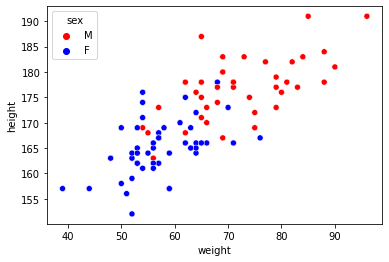

In [15]:
sns.scatterplot(x=test['weight'], y=test['height'], hue=test['sex'], palette=['red', 'blue'] )

<AxesSubplot:xlabel='weight', ylabel='height'>

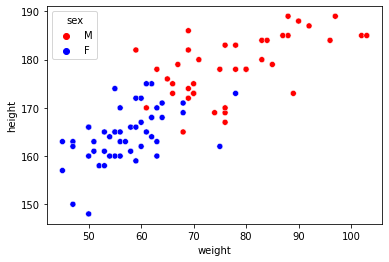

In [16]:
sns.scatterplot(x=train['weight'],  y=train['height'], hue=train['sex'], palette=['red', 'blue'])

## в) Отобразить train-выборку в виде точек на графике

<AxesSubplot:xlabel='weight', ylabel='height'>

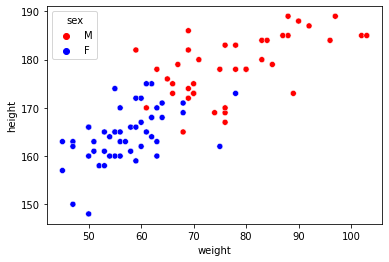

In [17]:
sns.scatterplot(x=train['weight'],  y=train['height'], hue=train['sex'], palette=['red', 'blue'])

<AxesSubplot:xlabel='repwt', ylabel='repht'>

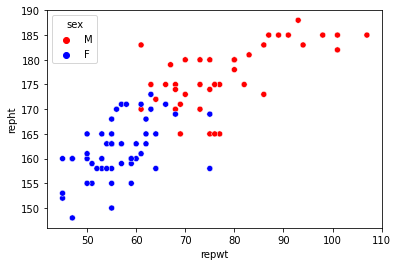

In [18]:
sns.scatterplot(x=train['repwt'],  y=train['repht'], hue=train['sex'], palette=['red', 'blue'])

## г) Пострить гистограммы

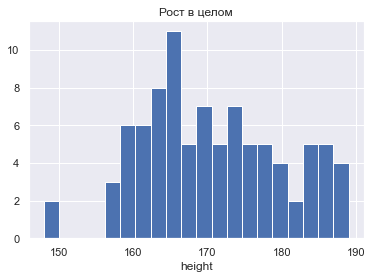

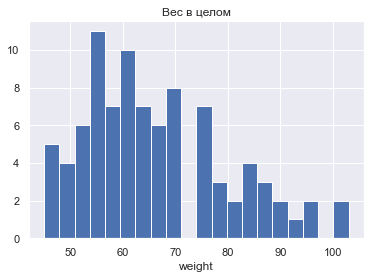

In [19]:
sns.set()
plt.hist(train["height"], bins = 20)
plt.title("Рост в целом")
plt.xlabel("height")
plt.show()
plt.hist(train["weight"], bins = 20)
plt.title("Вес в целом")
plt.xlabel("weight")
plt.show()

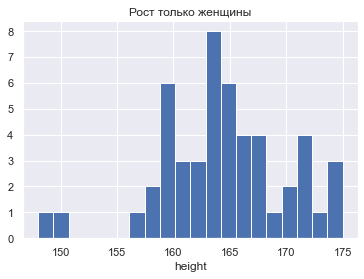

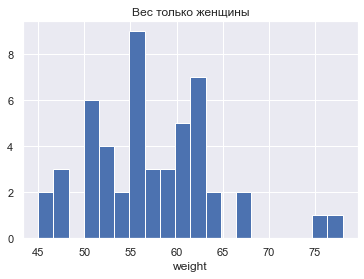

In [20]:
sns.set()
plt.hist(train[train.sex == 'F'].height, bins = 20)
plt.title("Рост только женщины")
plt.xlabel("height")
plt.show()
plt.hist(train[train.sex == 'F'].weight, bins = 20)
plt.title("Вес только женщины")
plt.xlabel("weight")
plt.show()

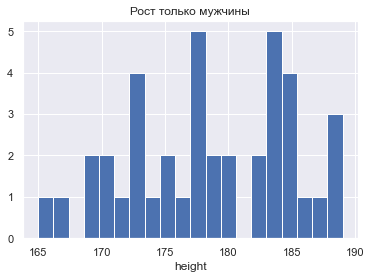

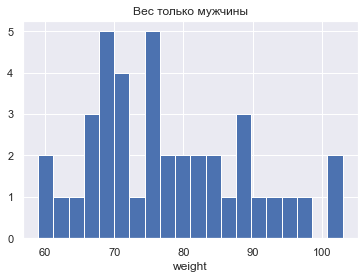

In [21]:

plt.hist(train[train.sex == 'M'].height, bins = 20)
plt.title("Рост только мужчины")
plt.xlabel("height")
plt.show()
plt.hist(train[train.sex == 'M'].weight, bins = 20)
plt.title("Вес только мужчины")
plt.xlabel("weight")
plt.show()

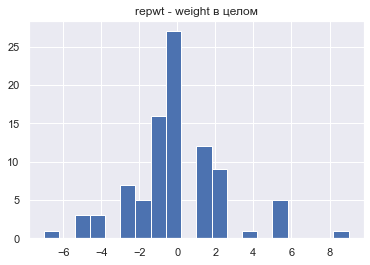

In [22]:
sns.set()
plt.hist(train["repwt"] - train["weight"], bins = 20)
plt.title("repwt - weight в целом")
plt.show()

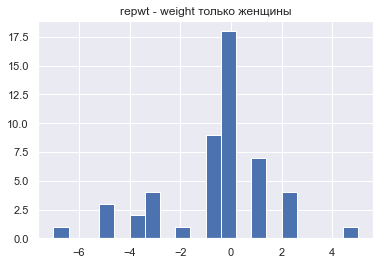

In [23]:
sns.set()
plt.hist(train[train.sex == 'F'].repwt - train[train.sex == 'F'].weight, bins = 20)
plt.title("repwt - weight только женщины")
plt.show()

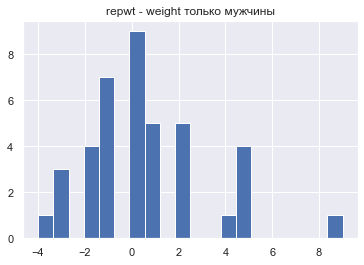

In [24]:
sns.set()
plt.hist(train[train.sex == 'M'].repwt - train[train.sex == 'M'].weight, bins = 20)
plt.title("repwt - weight только мужчины")
plt.show()

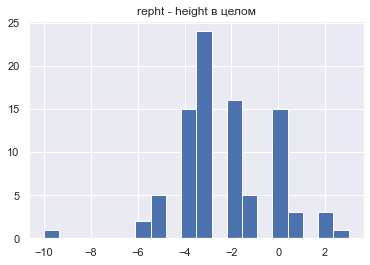

In [25]:
sns.set()
plt.hist(train["repht"] - train["height"], bins = 20)
plt.title("repht - height в целом")
plt.show()

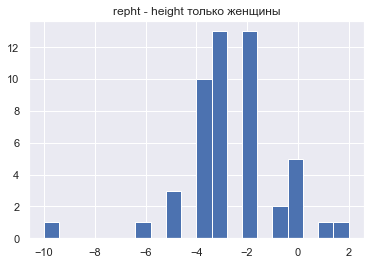

In [26]:
sns.set()
plt.hist(train[train.sex == 'F'].repht - train[train.sex == 'F'].height, bins = 20)
plt.title("repht - height только женщины")
plt.show()

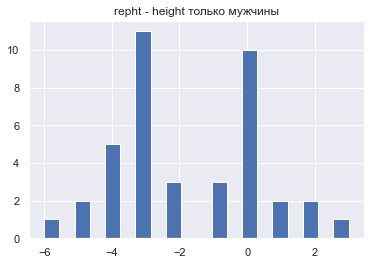

In [27]:
sns.set()
plt.hist(train[train.sex == 'M'].repht - train[train.sex == 'M'].height, bins = 20)
plt.title("repht - height только мужчины")
plt.show()

## д) Построить генератор данных (sex, height, weight)

In [28]:
class PointGenerator:
    def __init__(self):
        self.p_woman = None
        self.mean_height = {
            "F": None,
            "M": None
        }
        self.mean_weight = {
            "F": None,
            "M": None
        }
        self.covariance = {
            "F": None,
            "M": None
        }
        
    def fit(self, X_train):
        self.p_woman = len(X_train[X_train.sex == 'F']) / len(X_train)
        
        self.mean_height["F"] = X_train[X_train["sex"] == "F"]["height"].mean()
        self.mean_height["M"] = X_train[X_train["sex"] == "M"]["height"].mean()
        
        self.mean_weight["F"] = X_train[X_train["sex"] == "F"]["weight"].mean()
        self.mean_weight["M"] = X_train[X_train["sex"] == "M"]["weight"].mean()
        
        self.covariance["F"] = np.cov(X_train[X_train["sex"] == "F"]["height"], X_train[X_train["sex"] == "F"]["weight"])
        self.covariance["M"] = np.cov(X_train[X_train["sex"] == "M"]["height"], X_train[X_train["sex"] == "M"]["weight"])
        
    def generate_points(self, n_points):
        result = []
        column_list = ['sex','weight','height']
        for i in range(n_points):
            sex = np.random.choice(['F', 'M'], p = [self.p_woman, 1 - self.p_woman])
            weight, height = np.random.multivariate_normal([self.mean_weight[sex], self.mean_height[sex]], self.covariance[sex])
            weight, height = np.around(weight), np.around(height)
            result.append([sex, weight, height])
        return pd.DataFrame(data = result, columns = column_list)
    
    def log_likelihood(self, X):
        log_woman = np.log(self.p_woman * scipy.stats.multivariate_normal.pdf(X[X["sex"] == "F"][["weight", "height"]], mean = [self.mean_weight["F"], self.mean_height["F"]], cov = self.covariance["F"]))
        log_man = np.log((1 - self.p_woman) * scipy.stats.multivariate_normal.pdf(X[X["sex"] == "M"][["weight", "height"]], mean = [self.mean_weight["M"], self.mean_height["M"]], cov = self.covariance["M"]))
        return np.concatenate([ log_man, log_woman])
    
    def mean_log_likelihood(self, X):
        return self.log_likelihood(X).mean()

In [29]:
generator = PointGenerator()
generator.fit(train)
new_points = generator.generate_points(100)
new_points

,sex,weight,height
0,M,79.0,171.0
1,F,55.0,162.0
2,F,50.0,160.0
3,M,80.0,190.0
4,M,81.0,182.0
...,...,...,...
95,M,80.0,182.0
96,M,79.0,188.0
97,F,57.0,166.0
98,M,84.0,183.0


In [30]:
print("Правдоподобие для train: ", generator.mean_log_likelihood(train))
print("Правдоподобие для test: ", generator.mean_log_likelihood(test))
print("Правдоподобие для new_points: ", generator.mean_log_likelihood(new_points))

Правдоподобие для train:  -7.7733121144307225
Правдоподобие для test:  -7.81032368559203
Правдоподобие для new_points:  -7.361936505822014


<AxesSubplot:xlabel='weight', ylabel='height'>

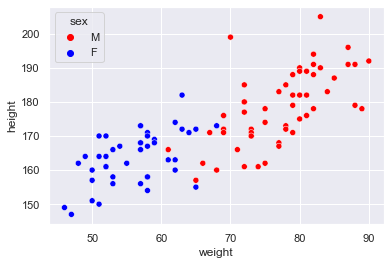

In [31]:
sns.scatterplot(x=new_points['weight'],  y=new_points['height'], hue=new_points['sex'], palette=['red', 'blue'])

## Часть 2
### а) Обучить градиентным спуском линейную модель

In [32]:
def update_w1b(x1, y, w1, b, alpha):
    dq_dw1 = (-2 / len(x1)) * np.array(x1 * (y - w1 * x1 - b)).sum()
    dq_db = (-2 / len(x1)) * np.array(y - w1 * x1 - b).sum()
    w1 -= alpha * dq_dw1 
    b -= alpha * dq_db
    return w1, b

In [33]:
def fit(x1, y, w1, b, alpha, epochs):
    wb_history = {"w1": [], "b": []}
    for e in range(epochs):
        w1, b = update_w1b(x1, y, w1, b, alpha)

        if e % 500 == 0:
            print("epoch: ", e, "loss: ", avg_loss(x1, y, w1, b))
            wb_history["w1"].append(w1)
            wb_history["b"].append(b) 

    return w1, b, wb_history

In [34]:
def avg_loss(x1, y, w1, b):
    loss = np.array((y - w1 * x1 - b)**2).sum()
    return loss / len(x1)

In [35]:
def predict(x1, w1, b):
    return w1 * x1 + b

In [36]:
x1_norm = (train["height"] - train["height"].min()) / (train["height"].max() - train["height"].min())
y_norm = (train["weight"] - train["weight"].min()) / (train["weight"].max() - train["weight"].min())

In [37]:
w1, b, history = fit(x1_norm, y_norm, 0.0, 0.0, 0.01, 5000)
print(f'W1:{w1}\nb:{b}')

epoch:  0 loss:  0.1819670747897325
epoch:  500 loss:  0.030030073827845123
epoch:  1000 loss:  0.024214548695364015
epoch:  1500 loss:  0.021500342254597047
epoch:  2000 loss:  0.020233575034834642
epoch:  2500 loss:  0.019642352803186273
epoch:  3000 loss:  0.019366419133809494
epoch:  3500 loss:  0.019237636104654024
epoch:  4000 loss:  0.019177530831397886
epoch:  4500 loss:  0.01914947865793307
W1:0.8308622605380811
b:-0.09327603752735474


<AxesSubplot:xlabel='height', ylabel='weight'>

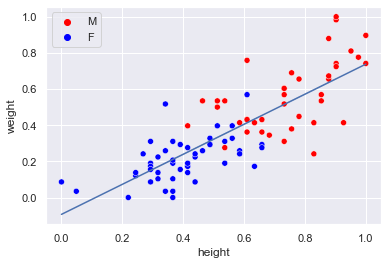

In [38]:
sns.scatterplot(x=x1_norm, y=y_norm, hue=train.sex, palette=['red', 'blue'])
sns.lineplot(x=x1_norm, y=predict(x1_norm, w1, b))

### Визуализация минимизируемого критерия

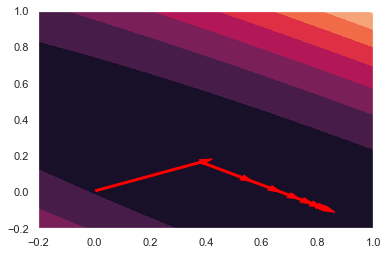

In [39]:
ww,bb = np.mgrid[-0.2:1:100j,-0.2:1:100j]
criterion = np.zeros(shape = (100,100))

for i in range(100):
    for j in range(100):
        criterion[i,j] = avg_loss(x1_norm, y_norm, ww[i,j], bb[i,j])

plt.contourf(ww, bb, criterion)
for i in range(len(history['w1']) - 1):
    plt.arrow(history['w1'][i], history['b'][i], history['w1'][i + 1] - history['w1'][i], history['b'][i + 1] - history['b'][i], color='RED', width=0.01)

### б) Обучите градиентным спуском линейную модель с 3мя переменными

In [40]:
def update_w1b_3(x1, y, sex, w1, w2, b, alpha):
    dq_dw1 = (-2 / len(x1)) * np.array(x1 * (y - w1 * x1 - w2 * sex - b)).sum()
    dq_dw2 = (-2 / len(x1)) * np.array(sex * (y - w1 * x1 - w2 * sex - b)).sum()
    dq_db = (-2 / len(x1)) * np.array(y - w1 * x1 - w2 * sex - b).sum()
    w1 -= alpha * dq_dw1 
    w2 -= alpha * dq_dw2
    b -= alpha * dq_db
    return w1, w2, b

In [41]:
def fit_3(x1, y, sex, w1, w2, b, alpha, epochs):
    wb_history = {"w1": [], "w2": [], "b": []}
    for e in range(epochs):
        w1, w2, b = update_w1b_3(x1, y, sex, w1, w2, b, alpha)

        if e % 500 == 0:
            print("epoch: ", e, "loss: ", avg_loss_3(x1, y, sex, w1, w2, b))
            wb_history["w1"].append(w1)
            wb_history["w2"].append(w2)
            wb_history["b"].append(b) 

    return w1, w2, b, wb_history

In [42]:
def avg_loss_3(x1, y, sex, w1, w2, b):
    loss = np.array((y - w1 * x1 - w2 * sex - b)**2).sum()
    return loss / len(x1)

In [43]:
def predict_3(x1, sex, w1, w2, b):
    return w1 * x1 + w2 * sex + b

In [44]:
x1_norm = (train["height"] - train["height"].min()) / (train["height"].max() - train["height"].min())
y_norm = (train["weight"] - train["weight"].min()) / (train["weight"].max() - train["weight"].min())
sex = train["sex"].replace({'M': 1, 'F': 0})

In [45]:
w1, w2, b, history = fit_3(x1_norm, y_norm, sex, 0, 0, 0, 0.01, 5000)
print(f'W1:{w1}\nW2:{w2}\nb:{b}')

epoch:  0 loss:  0.17951574623729719
epoch:  500 loss:  0.019641706104972137
epoch:  1000 loss:  0.01875127521715429
epoch:  1500 loss:  0.018201747140237097
epoch:  2000 loss:  0.017806618325676805
epoch:  2500 loss:  0.017521317000569112
epoch:  3000 loss:  0.01731529448181101
epoch:  3500 loss:  0.01716652058135166
epoch:  4000 loss:  0.01705908730138528
epoch:  4500 loss:  0.016981507096603975
W1:0.5065820658061035
W2:0.1808113739348037
b:0.006295233139003324


<AxesSubplot:xlabel='height', ylabel='weight'>

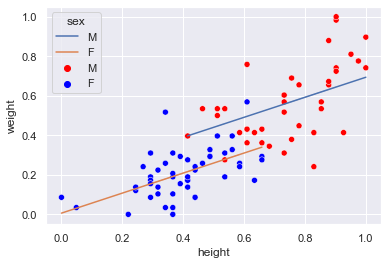

In [46]:
sns.scatterplot(x=x1_norm, y=y_norm, hue=train["sex"], palette=['red', 'blue'])
sns.lineplot(x=x1_norm, y=predict_3(x1_norm, sex, w1, w2, b), hue=train.sex)